In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
#!python -m spacy download el_core_news_sm

In [3]:
efsyn_full_articles_df = pd.read_csv('https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%209/efsyn_full_articles_ekloges_2023_7_5_2023.csv')
efsyn_full_articles_df

site                                                url  \
0    efsyn.gr  https://www.efsyn.gr/politiki/392624_ena-debat...   
1    efsyn.gr  https://www.efsyn.gr/politiki/paraskinia/39261...   
2    efsyn.gr  https://www.efsyn.gr/politiki/392608_yperaspis...   
3    efsyn.gr  https://www.efsyn.gr/politiki/392600_debate-gi...   
4    efsyn.gr  https://www.efsyn.gr/politiki/392590_plastogra...   
..        ...                                                ...   
115  efsyn.gr  https://www.efsyn.gr/politiki/391778_aposyreta...   
116  efsyn.gr  https://www.efsyn.gr/politiki/antipoliteysi/39...   
117  efsyn.gr  https://www.efsyn.gr/ellada/koinonia/391758_di...   
118  efsyn.gr  https://www.efsyn.gr/politiki/391753_synedriaz...   
119  efsyn.gr  https://www.efsyn.gr/politiki/391765_kalesma-t...   

           section                                              title  \
0         ΠΟΛΙΤΙΚΗ            Ένα debate με πέντε πολιτικούς αρχηγούς   
1       ΠΑΡΑΣΚΗΝΙΑ                      Κυριάκο κάντο όπως ο Αλμπέρτο   
2         ΠΟΛΙΤΙΚΗ  Υπερασπίστηκε τη μείωση της φορολογίας, βάζοντ...   
3         ΠΟΛΙΤΙΚΗ    Debate για πέντε η πρόταση της Νέας Δημοκρατίας   
4         ΠΟΛΙΤΙΚΗ                 Πλαστογραφίας το… «μπλε» ανάγνωσμα   
..             ...                                                ...   
115       ΠΟΛΙΤΙΚΗ              Αποσύρεται το «ΕΑΝ» του Κανελλόπουλου   
116  ΑΝΤΙΠΟΛΙΤΕΥΣΗ                       ΟΚΔΕ: Συνεχίζουμε τον αγώνα!   
117       ΚΟΙΝΩΝΙΑ     Διαψεύδει εμπλοκή με τη «Νίκη» ο Βίκτωρ Ρέστης   
118       ΠΟΛΙΤΙΚΗ  Συνεδριάζει η Διακομματική Επιτροπή για τις εν...   
119       ΠΟΛΙΤΙΚΗ                        Κάλεσμα Τσίπρα για ανατροπή   

                 date                        author  \
0    2023-06-06 14:40                     efsyn.gr    
1    2023-06-06 14:18                         Σ.Ι.    
2    2023-06-06 13:48                     efsyn.gr    
3    2023-06-06 13:31                     efsyn.gr    
4    2023-06-06 12:51   Επιμέλεια: Στράτος Ιωακείμ    
..                ...                           ...   
115  2023-05-30 10:22                     efsyn.gr    
116  2023-05-30 10:01                    efsyn. gr    
117  2023-05-30 09:28            Απόστολος Λυκεσάς    
118  2023-05-30 07:39                     efsyn.gr    
119  2023-05-30 06:00              Δημήτρης Τερζής    

                                             full_text  
0    Τη διεξαγωγή μια τηλεμαχίας μεταξύ των πολιτικ...  
1    Το δρόμο για τη διεξαγωγή της τηλεμαχία δείχνε...  
2    Με υποσχέσεις με φορολογικές μειώσεις πήγε και...  
3    Με τον αλαζονικό αέρα της πρωτιάς προσέρχεται ...  
4    Μπούμερανγκ γυρίζουν στη Ν.Δ. τα fake news με ...  
..                                                 ...  
115  Δεν θα συμμετέχει στις εκλογές της 25ης Ιουνίο...  
116  «Η ΟΚΔΕ (Οργάνωση Κομμουνιστών Διεθνιστών Ελλά...  
117  Το χθεσινό ρεπορτάζ της «Εφ.Συν.» για τις σχέσ...  
118  Συνεδριάζει σήμερα το μεσημέρι στο υπουργείο Ε...  
119  Την παρθενική της συνεδρίαση πραγματοποίησε χθ...  

[120 rows x 7 columns]

# Επανάληψη Wordcloud

θα χρησιμοποιήσουμε τα παραπάνω άρθρα που μαζέψαμε από την efsyn

In [4]:
efsyn_full_articles_df.head(1)

site                                                url   section  \
0  efsyn.gr  https://www.efsyn.gr/politiki/392624_ena-debat...  ΠΟΛΙΤΙΚΗ   

                                     title              date      author  \
0  Ένα debate με πέντε πολιτικούς αρχηγούς  2023-06-06 14:40   efsyn.gr    

                                           full_text  
0  Τη διεξαγωγή μια τηλεμαχίας μεταξύ των πολιτικ...

In [9]:
efsyn_full_articles_df.dtypes

site         object
url          object
section      object
title        object
date         object
author       object
full_text    object
dtype: object

O τύπος δεδομένων της ημερομηνίας (date) είναι object (κείμενο). Ας τη μετατρέψουμε σε datetime.

Πρώτα βλέπουμε τη μορφή της - πώς είναι γραμμένη.

In [8]:
efsyn_full_articles_df.loc[0, 'date']

'2023-06-06 14:40'

H μορφή της είναι: ΥΥΥΥ-ΜΜ-DD HH:MM

In [11]:
efsyn_full_articles_df['datetime'] = pd.to_datetime(efsyn_full_articles_df['date'], format='%Y-%m-%d %H:%M')

Ας ξαναδούμε τον τύπο των δεδομένων

In [12]:
efsyn_full_articles_df.dtypes

site                 object
url                  object
section              object
title                object
date                 object
author               object
full_text            object
datetime     datetime64[ns]
dtype: object

Ας φτιάξουμε ένα μικρότερο dataframe, που να περιέχει μόνο το datetime και το full_text

In [23]:
short_efsyn_df = efsyn_full_articles_df[['datetime','full_text']]
short_efsyn_df.head(1)

datetime                                          full_text
0 2023-06-06 14:40:00  Τη διεξαγωγή μια τηλεμαχίας μεταξύ των πολιτικ...

Ας φτιάξουμε στήλες για το έτος, το μήνα, την ημέρα και την ώρα (αυτό είναι εφικτό γιατί η ημερομηνία είναι datetime)

In [24]:
short_efsyn_df['year'] = pd.DatetimeIndex(short_efsyn_df['datetime']).year
short_efsyn_df['month'] = pd.DatetimeIndex(short_efsyn_df['datetime']).month
short_efsyn_df['day'] = pd.DatetimeIndex(short_efsyn_df['datetime']).day
short_efsyn_df['hour'] = pd.DatetimeIndex(short_efsyn_df['datetime']).hour

<ipython-input-24-9f749c3b0659>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_efsyn_df['year'] = pd.DatetimeIndex(short_efsyn_df['datetime']).year
<ipython-input-24-9f749c3b0659>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_efsyn_df['month'] = pd.DatetimeIndex(short_efsyn_df['datetime']).month
<ipython-input-24-9f749c3b0659>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [25]:
short_efsyn_df.head()

datetime                                          full_text  \
0 2023-06-06 14:40:00  Τη διεξαγωγή μια τηλεμαχίας μεταξύ των πολιτικ...   
1 2023-06-06 14:18:00  Το δρόμο για τη διεξαγωγή της τηλεμαχία δείχνε...   
2 2023-06-06 13:48:00  Με υποσχέσεις με φορολογικές μειώσεις πήγε και...   
3 2023-06-06 13:31:00  Με τον αλαζονικό αέρα της πρωτιάς προσέρχεται ...   
4 2023-06-06 12:51:00  Μπούμερανγκ γυρίζουν στη Ν.Δ. τα fake news με ...   

     year  month  day  hour  
0  2023.0    6.0  6.0  14.0  
1  2023.0    6.0  6.0  14.0  
2  2023.0    6.0  6.0  13.0  
3  2023.0    6.0  6.0  13.0  
4  2023.0    6.0  6.0  12.0

Ας δούμε πόσα άρθρα έχουν δημοσιευτεί κάθε μήνα

<Axes: >

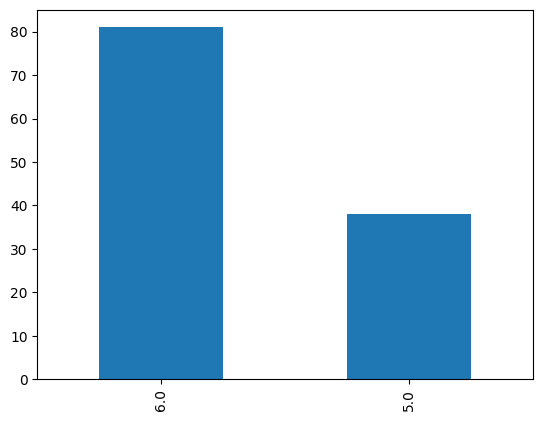

In [29]:
short_efsyn_df['month'].value_counts().plot(kind='bar')

Ας δούμε πόσα άρθρα έχουν δημοσιευτεί κάθε μέρα

<Axes: >

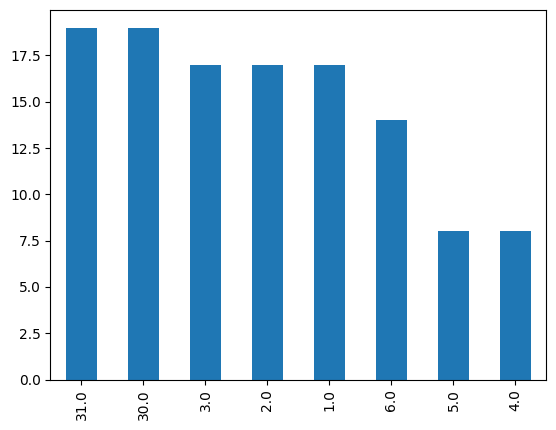

In [28]:
short_efsyn_df['day'].value_counts().plot(kind='bar')

Ας δούμε πόσα άρθρα έχουν δημοσιευτεί κάθε ώρα

<Axes: >

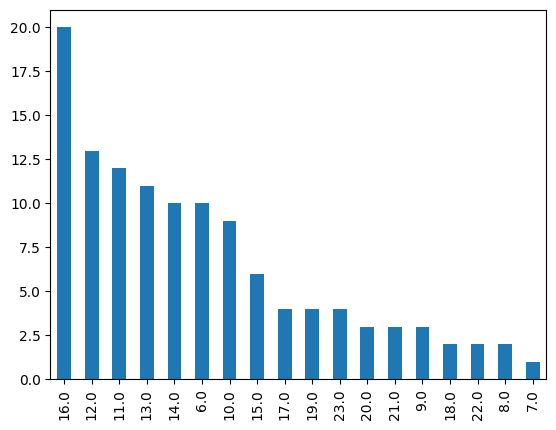

In [26]:
short_efsyn_df['hour'].value_counts().plot(kind='bar')

Ας δούμε ποιες είναι οι συχνότερες λέξεις στα κείμενα.

Ενώνουμε όλα τα full_texts σε ένα string

In [32]:
text = short_efsyn_df['full_text'].str.cat(sep = ' ')

Ας φορτώσουμε το λεξικό της spacy για να έχουμε ελληνικά stopwords

In [33]:
nlp = spacy.load('el_core_news_sm')

Ας φτιάξουμε ένα wordcloud

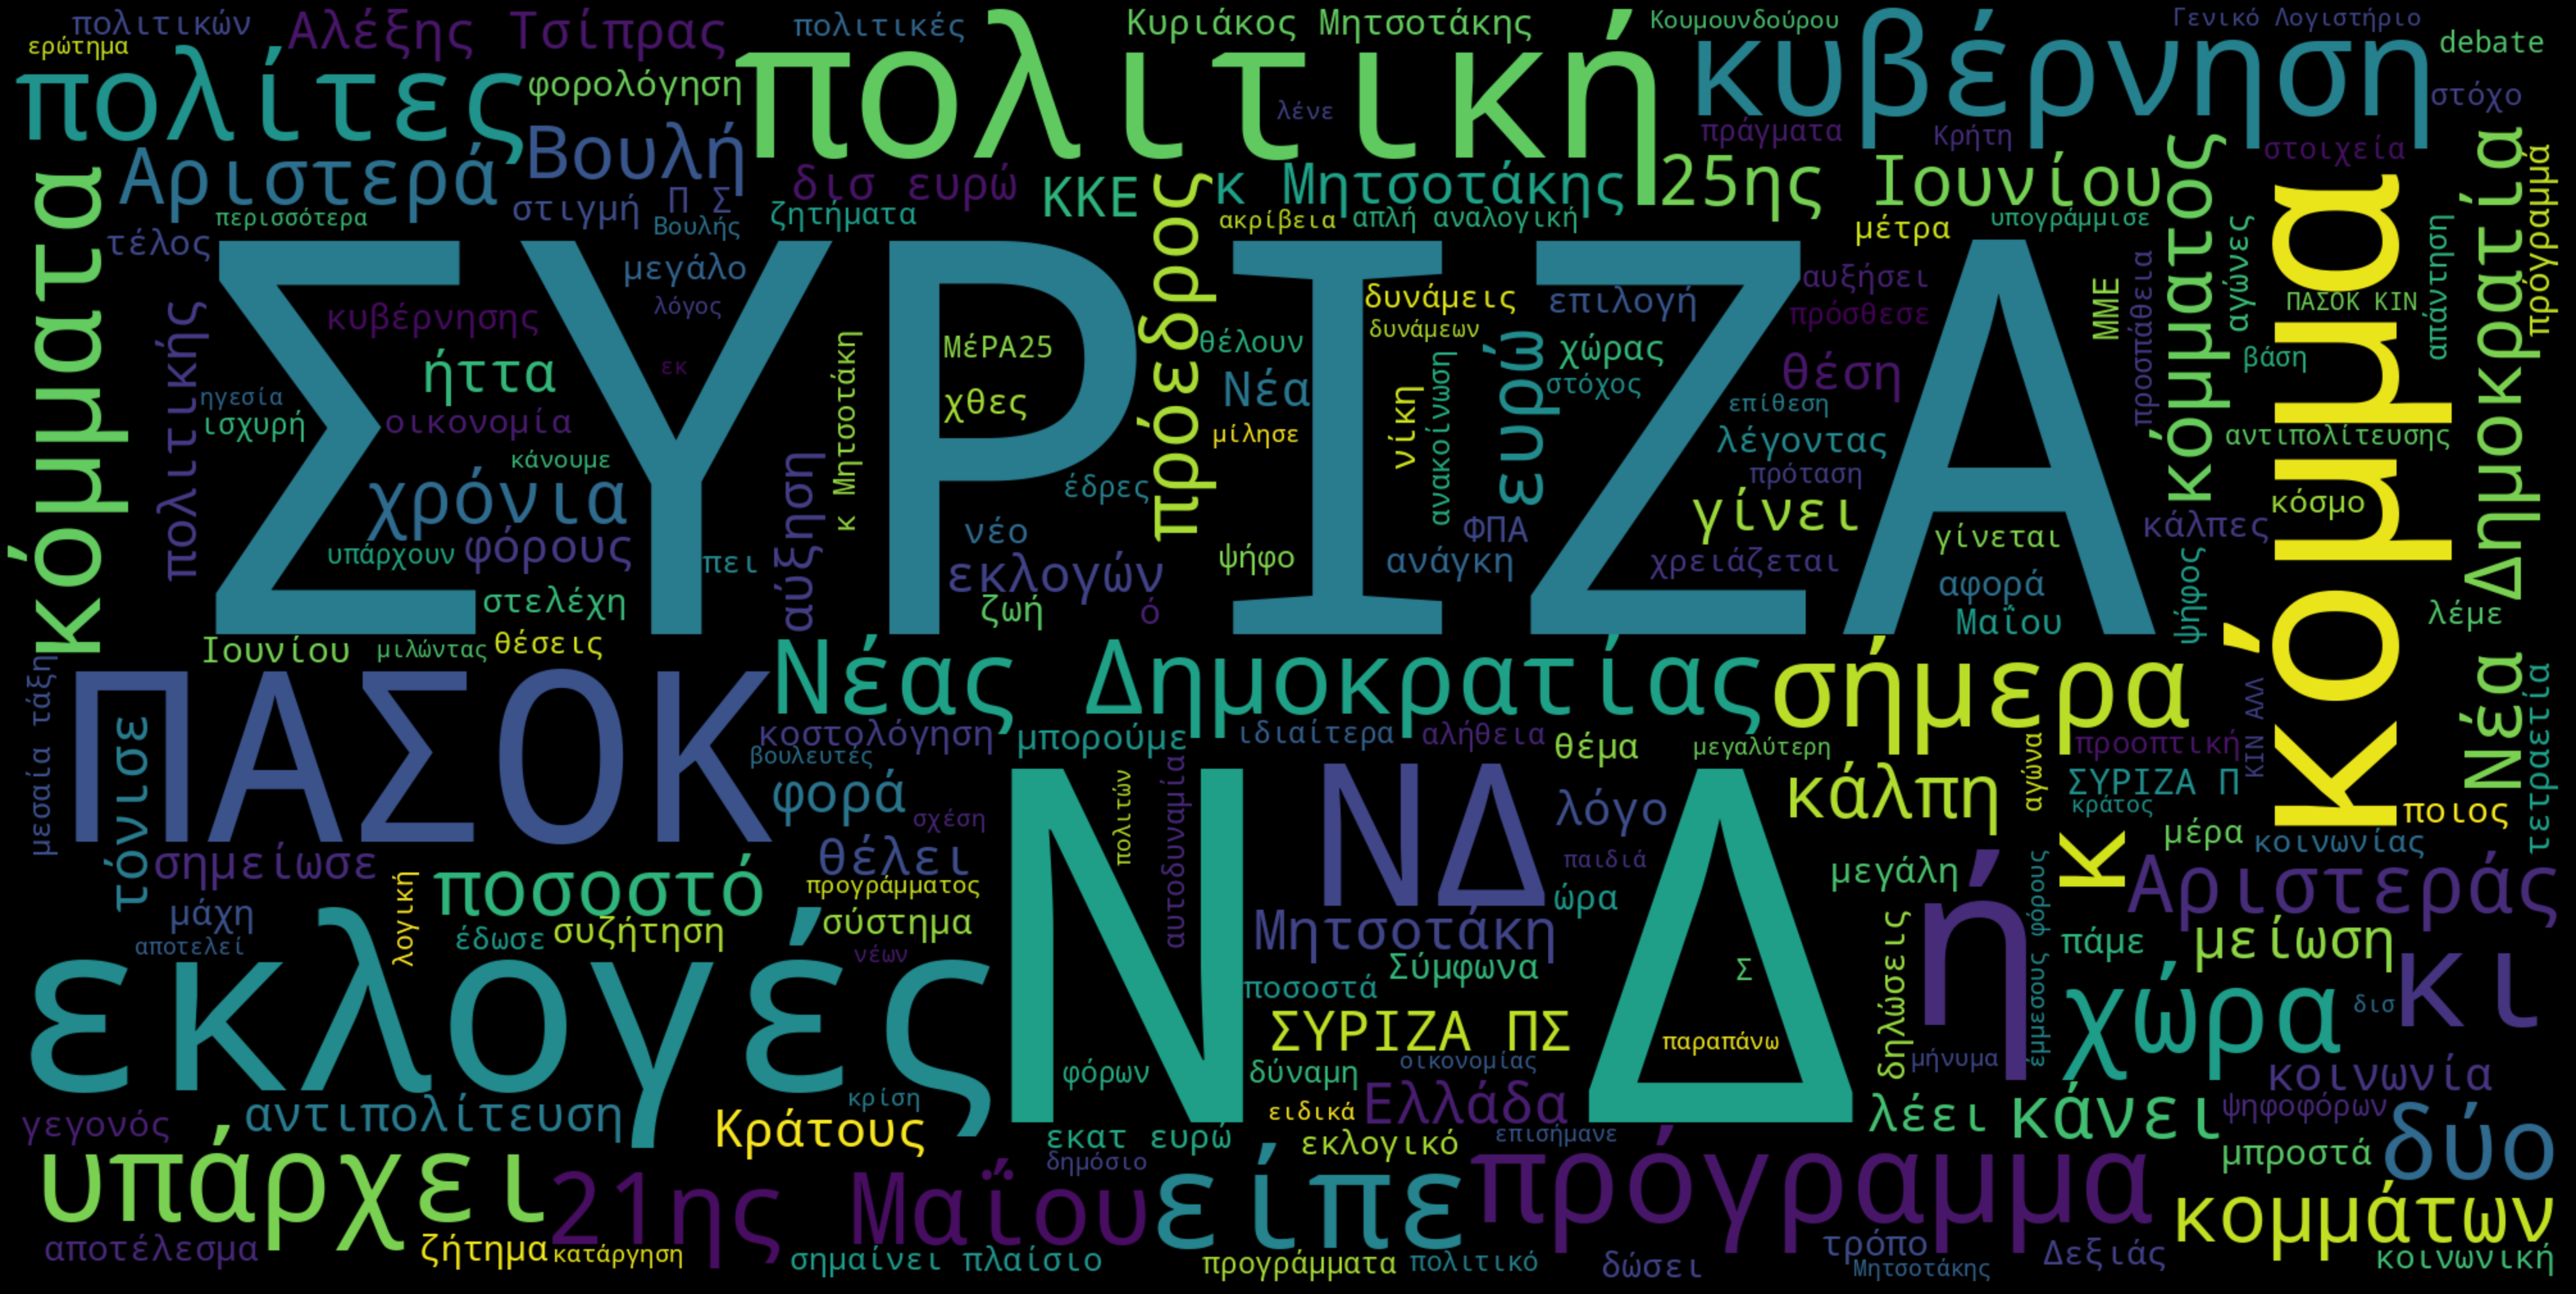

In [35]:
wordcloud1 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# αν θέλουμε, αποθηκεύουμε την εικόνα του wordcloud
#<το όνομα που δώσαμε στο wordcloud>.to_file('<το path>/<το όνομα που θα δώσετε στο γράφημα>.png')
wordcloud1.to_file('/content/drive/MyDrive/2023/teaching python/Lesson 9/wordcloud_efsyn_1.png')

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο... (lemmatization)

Περνάμε το κείμενο όλων των άρθρων που φτιάξαμε προηγουμένως, από την nlp για να μπορούμε να πάρουμε το λήμμα της κάθε λέξης

In [37]:
full_doc = nlp(text)

In [42]:
full_doc[:200]

Τη διεξαγωγή μια τηλεμαχίας μεταξύ των πολιτικών αρχηγών των πέντε κομμάτων που εισήλθαν στη Βουλή, όπως προέκυψε από την κάλπη της 21ης Μαΐου, αποφάσισε η Διακομματική Επιτροπή. Η Νέα Δημοκρατία προσήλθε στη Διακομματική με τον αλαζονικό αέρα της πρωτιάς προτείνοντας αυτό που αποφασίσθηκε, δηλαδή τη διεξαγωγή debate με πέντε πολιτικούς αρχηγούς (Κυριάκος Μητσοτάκης, Αλέξης Τσίπρας, Νίκος Ανδρουλάκης, Δημήτρης Κουτσούμπας και Κυριάκος Βελόπουλος) εκτοπίζοντας τον Γιάννη Βαρουφάκη, το κόμμα του οποίου δεν κατόρθωσε στις εκλογές της 21ης Μαΐου να πιάσει το όριο του 3% για να εισέλθει στη Βουλή. «Εμείς πιστεύουμε ότι οι τηλεμαχίες, οι συζητήσεις μεταξύ των πολιτικών αρχηγών, είναι οξυγόνο για τη Δημοκρατία» είχε δηλώσει νωρίτερα ο Άκης Σκέρτσος, προσθέτοντας πως «προσερχόμαστε με θέση να γίνει η τηλεμαχία για όλα τα κόμματα που έχουν εκλεγεί από την τελευταία κάλπη». Σύμφωνα με κομματικές πηγές η Κουμουνδούρου πρότεινε να διεξαχθούν δύο debate «ένα μεταξύ των πέντε πολιτικών αρχηγών, όπως

Πέρνουμε το λήμμα κάθε λέξης και ενώνουμε όλα τα λήμματα σε ένα κείμενο

In [39]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

In [98]:
lemmatized_text[:1000]

'Τη διεξαγωγή ένας τηλεμαχία μεταξύ ο πολιτικός αρχηγός ο πέντε κόμμα που εισήλθαν σε ο βουλή , όπως προέκυψε από ο κάλπη ο 21ος μαΐου , αποφασίζω ο Διακομματική επιτροπή . ο νέος δημοκρατία προσήλθε σε ο διακομματικής με ο αλαζονικός αέρας ο πρωτιά προτείνοντας αυτός που αποφασίσθηκε , δηλαδή ο διεξαγωγή debate με πέντε πολιτικός αρχηγός ( Κυριάκος Μητσοτάκης , Αλέξη Τσίπρα , Νίκος Ανδρουλάκης , Δημήτρης κουτσούμπας και Κυριάκος Βελόπουλος ) εκτοπίζο ο Γιάννης Βαρουφάκη , ο κόμμα ο οποίος δεν κατόρθωσε σε ο εκλογή ο 21ης μαΐου να πιάσει ο όριο ο 3% για να εισέλθει σε ο βουλή . « εγώ πιστεύω ότι ο τηλεμαχία , ο συζήτηση μεταξύ ο πολιτικός αρχηγός , είμαι οξυγόνο για ο δημοκρατία » έχω δηλώνω νωρίς ο Άκης Σκέρτσος , προσθέτω πως « προσερχόμαστε με θέση να γίνομαι ο τηλεμαχία για \xa0 όλος ο κόμμα που έχω εκλεγεί από ο τελευταίος κάλπη » . σύμφωνα με κομματικός πηγή ο Κουμουνδούρου πρότεινε να διεξάγω δύο debate « ένας μεταξύ ο πέντε πολιτικός αρχηγός , όπως ζητώ και ο άλλος κόμμα , και 

Ας δούμε το wordcloud από το lemmatzized text

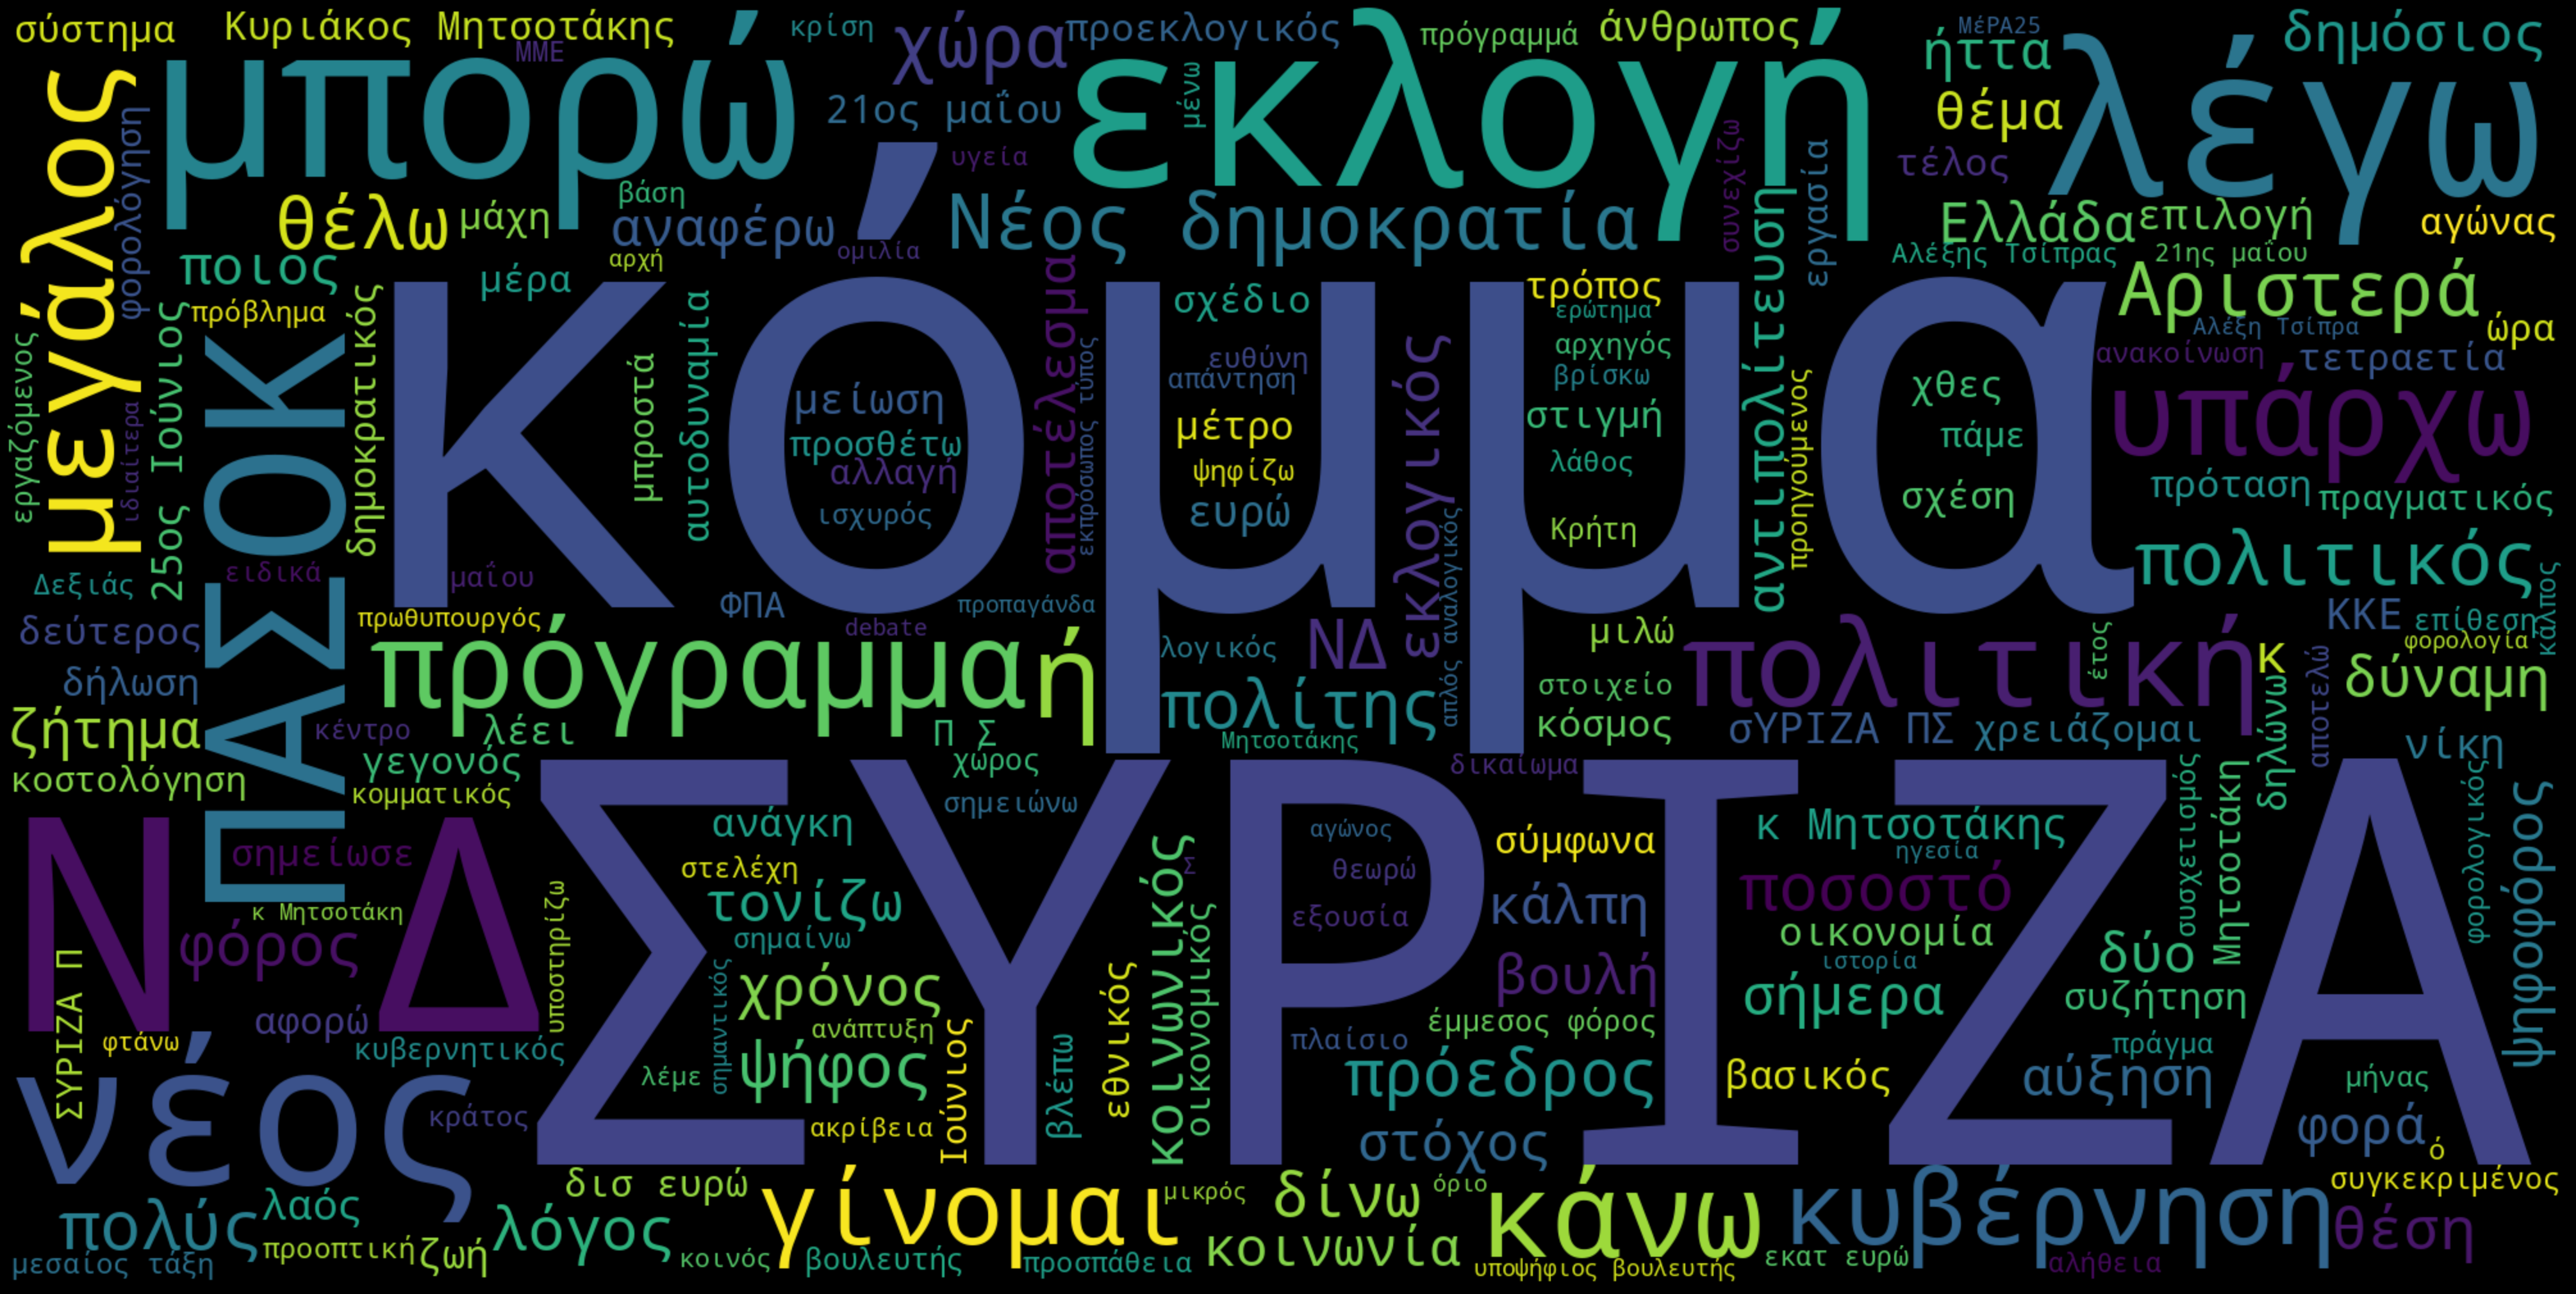

In [45]:
wordcloud2 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



---



---



# Vectorization starts here...

# Διανυσματοποίηση Εγγράφων/κειμένων (Vectorization)


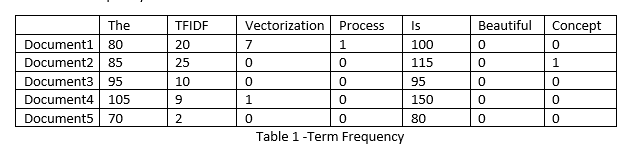

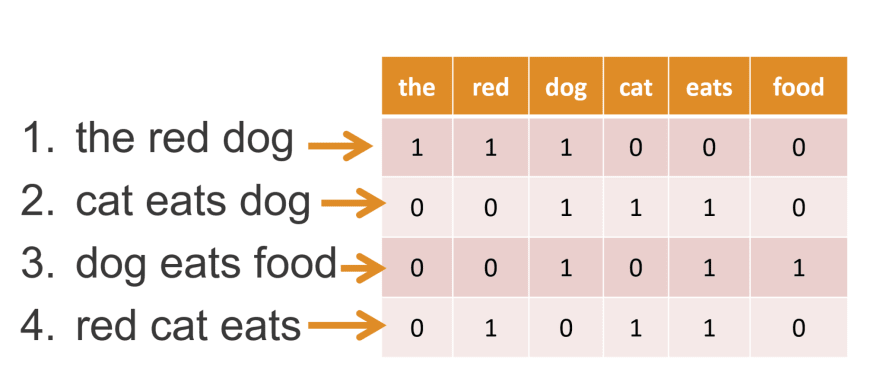

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

O CountVectorizer() παίρνει διάφορες παραμέτρους μέσα στην παρένθεση.

Πληροφορίες για όλες τις παραμέτρους βρίσκουμε εδώ: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Ας φτιάξουμε έναν vectorizer με τις default παραμέτρους, δηλαδή χωρίς να βάλουμε τίποτα μέσα στην παρένθεση)

In [ ]:
cv = CountVectorizer()

Περνάμε τη στήλη full_text από τον vectorizer

In [47]:
count_vector = cv.fit_transform(short_efsyn_df['full_text'])

In [48]:
count_vector.shape

(120, 11928)

Φτιάχνουμε ένα dataframe με τα αποτελέσματα του vectorizer.

In [49]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()

00  000  006  02  04  05  06  07  10  100  ...  ύψος  ύψους  ώρα  ώρας  \
0   1    0    0   0   0   0   0   0   0    0  ...     0      0    1     0   
1   0    0    0   0   0   0   0   0   0    0  ...     0      0    0     0   
2   0    0    0   0   0   0   0   0   0    0  ...     0      0    0     0   
3   0    0    0   0   0   0   0   0   0    0  ...     0      0    0     0   
4   0    0    0   0   0   0   0   0   0    0  ...     0      0    0     0   

   ώρες  ώριμο  ώριμος  ώριμου  ώς  ώστε  
0     1      0       0       0   0     0  
1     0      0       0       0   0     0  
2     0      0       0       0   0     0  
3     0      0       0       0   0     0  
4     0      0       0       0   0     1  

[5 rows x 11928 columns]

**Vectorizer με stop words**

In [50]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [51]:
count_vector = cv.fit_transform(short_efsyn_df['full_text'])

In [53]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()

00  000  006  02  04  05  06  07  10  100  ...  ύψη  ύψος  ύψους  ώρα  \
0   1    0    0   0   0   0   0   0   0    0  ...    0     0      0    1   
1   0    0    0   0   0   0   0   0   0    0  ...    0     0      0    0   
2   0    0    0   0   0   0   0   0   0    0  ...    0     0      0    0   
3   0    0    0   0   0   0   0   0   0    0  ...    0     0      0    0   
4   0    0    0   0   0   0   0   0   0    0  ...    0     0      0    0   

   ώρας  ώρες  ώριμο  ώριμος  ώριμου  ώς  
0     0     1      0       0       0   0  
1     0     0      0       0       0   0  
2     0     0      0       0       0   0  
3     0     0      0       0       0   0  
4     0     0      0       0       0   0  

[5 rows x 11520 columns]

**Vectorizer με stop words και όρια στις συχνότητες εμφάνισης των λέξεων**

In [54]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [55]:
count_vector = cv.fit_transform(short_efsyn_df['full_text'])

In [56]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 

results.head()

000  05  10  100  11  114  12  120  13  13η  ...  ύπαρξης  ύφεση  ύφος  \
0    0   0   0    0   0    0   0    0   0    0  ...        0      0     0   
1    0   0   0    0   0    0   0    0   0    0  ...        0      0     0   
2    0   0   0    0   1    0   0    0   0    0  ...        0      0     0   
3    0   0   0    0   0    0   0    0   0    0  ...        0      0     0   
4    0   0   0    0   0    0   0    0   0    0  ...        0      0     0   

   ύψος  ύψους  ώρα  ώρας  ώρες  ώριμο  ώς  
0     0      0    1     0     1      0   0  
1     0      0    0     0     0      0   0  
2     0      0    0     0     0      0   0  
3     0      0    0     0     0      0   0  
4     0      0    0     0     0      0   0  

[5 rows x 4323 columns]

**Note**: παρατηρήστε παραπάνω πώς αλλάζει ο αριθμός των στηλών στα results καθώς χρησιμοποιούμε διαφορετικές παραμετροποιήσεις

**Vectorizer με stop words και max_features**

In [58]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_efsyn_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

είπε  εκλογές  ευρώ  ιουνίου  κι  κομμάτων  κυβέρνηση  κόμμα  κόμματα  \
0     0        2     0        1   0         3          0      1        2   
1     0        0     0        0   0         0          0      0        0   
2     2        1     0        2   0         0          5      1        1   
3     1        3     0        0   0         1          0      1        2   
4     0        1     1        0   0         3          0      1        1   

   μαΐου  μητσοτάκη  μητσοτάκης  νέα  νέας  νδ  πασοκ  πολιτική  πρόγραμμα  \
0      5          0           3    2     0   0      0         0          0   
1      0          1           1    0     0   0      0         0          0   
2      2          1           1    4     2   0      1         1          0   
3      3          0           3    1     0   0      0         0          0   
4      1          0           2    0     0   2      0         0          1   

   συριζα  τσίπρας  
0       0        1  
1       0        0  
2       1        0  
3       2        1  
4       4        0

**Vectorizer με stop words, max features και token pattern**

In [59]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(short_efsyn_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

κυβέρνησή  κυβέρνησής  κυβέρνηση  κυβέρνησης  κυβερνήσει  κυβερνήσεις  \
0          0           0          0           0           0            0   
1          0           0          0           0           0            0   
2          0           1          5           0           0            0   
3          0           0          0           0           0            0   
4          0           0          0           0           0            0   

   κυβερνηθεί  κυβερνησιμότητα  κυβερνητικά  κυβερνητικές  κυβερνητική  \
0           0                0            0             0            0   
1           0                0            0             0            0   
2           0                0            0             0            0   
3           0                0            0             0            0   
4           0                0            0             0            0   

   κυβερνητικής  κυβερνητικοί  κυβερνητικού  κυβερνητικό  κυβερνητικός  \
0             0             0             0            0             0   
1             0             0             0            0             0   
2             0             0             0            0             0   
3             0             0             0            0             0   
4             0             0             0            1             0   

   κυβερνητικών  κυβερνοεπίθεση  κυβερνώνται  κυβερνώντος  
0             0               0            0            0  
1             0               0            0            0  
2             0               0            0            0  
3             0               0            0            0  
4             0               0            0            0

**Vectorizer με ngrams**

In [60]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_efsyn_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

21ης μαΐου  25 ιουνίου  25ης ιουνίου  αλέξης τσίπρας  απλή αναλογική  \
0           3           0             0               1               0   
1           0           0             0               0               0   
2           1           1             1               0               2   
3           3           0             0               1               0   
4           1           0             0               0               0   

   γενικό λογιστήριο  δισ ευρώ  εκατ ευρώ  εκλογές 21ης  εκλογές 25ης  \
0                  0         0          0             2             0   
1                  0         0          0             0             0   
2                  0         0          0             0             0   
3                  0         0          0             3             0   
4                  6         1          0             1             0   

   κιν αλλ  κυριάκος μητσοτάκης  λογιστήριο κράτους  μεσαία τάξη  \
0        0                    1                   0            0   
1        0                    1                   0            0   
2        0                    1                   0            0   
3        0                    2                   0            0   
4        0                    1                   6            0   

   νέα δημοκρατία  νέας δημοκρατίας  πασοκ κιν  πρόεδρος συριζα  συριζα πασοκ  \
0               1                 0          0                0             0   
1               0                 0          0                0             0   
2               1                 2          0                0             0   
3               1                 0          0                0             0   
4               0                 0          0                0             0   

   συριζα πς  
0          0  
1          0  
2          0  
3          0  
4          2

In [61]:
results.sum(axis =0).sort_values(ascending = False)

νέας δημοκρατίας       66
21ης μαΐου             65
νέα δημοκρατία         62
25ης ιουνίου           52
συριζα πς              47
αλέξης τσίπρας         46
δισ ευρώ               38
κυριάκος μητσοτάκης    37
εκλογές 21ης           36
πρόεδρος συριζα        33
εκλογές 25ης           31
εκατ ευρώ              26
μεσαία τάξη            23
απλή αναλογική         22
γενικό λογιστήριο      21
λογιστήριο κράτους     21
συριζα πασοκ           21
πασοκ κιν              20
25 ιουνίου             19
κιν αλλ                19
dtype: int64

In [62]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   

νέας δημοκρατίας    66
21ης μαΐου          65
νέα δημοκρατία      62
25ης ιουνίου        52
συριζα πς           47
dtype: int64

**Vectorizer με χρήση λεξικού**

In [67]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['αντιπολίτευση', 'κυβέρνηση', 'νδ', 'συριζα'])
count_vector = cv.fit_transform(short_efsyn_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out()) 
results.head()

αντιπολίτευση  κυβέρνηση  νδ  συριζα
0              0          0   0       0
1              0          0   0       0
2              0          5   0       1
3              0          0   0       2
4              0          0   2       4

### **TfidfVectorizer**

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_efsyn_df['full_text'])  #finds the tfidf score with normalization

In [71]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) 
results.head()

000   10  100        15   17   20  2015  2019  2022  2023  ...      ψήφο  \
0  0.0  0.0  0.0  0.075385  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.000000   
1  0.0  0.0  0.0  0.000000  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.000000   
2  0.0  0.0  0.0  0.000000  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.064584   
3  0.0  0.0  0.0  0.000000  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.000000   
4  0.0  0.0  0.0  0.055892  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.000000   

   ψήφος  ψήφου  ψήφους  ψηφοφόροι  ψηφοφόρους  ψηφοφόρων      όριο      όψει  \
0    0.0    0.0     0.0        0.0         0.0        0.0  0.078879  0.000000   
1    0.0    0.0     0.0        0.0         0.0        0.0  0.000000  0.000000   
2    0.0    0.0     0.0        0.0         0.0        0.0  0.000000  0.073179   
3    0.0    0.0     0.0        0.0         0.0        0.0  0.092949  0.000000   
4    0.0    0.0     0.0        0.0         0.0        0.0  0.000000  0.000000   

        ώρα  
0  0.060147  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  

[5 rows x 500 columns]

### **Cosine similarity (ομοιότητα κειμένων)**

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.38058082 0.08919953 0.79114858 0.1110204  0.06503294
  0.05673259 0.083073   0.06119561 0.14567781 0.03344745 0.14911076
  0.09144069 0.0778554  0.01338392 0.4926649  0.07381304 0.10366383
  0.08383116 0.03184448 0.08109366 0.10420205 0.03181398 0.05287543
  0.07559833 0.11378058 0.10303256 0.11217097 0.13780662 0.07575749
  0.11172082 0.10191649 0.09299602 0.20313837 0.11843904 0.06322708
  0.06051034 0.08233288 0.09423162 0.15768908 0.13940624 0.01291118
  0.12851634 0.         0.1674693  0.01879462 0.10816536 0.10027798
  0.08804647 0.12285129 0.14622255 0.14794383 0.09455282 0.16142274
  0.10567518 0.08274023 0.14944919 0.09135166 0.11113138 0.14591939
  0.0237286  0.12897104 0.1034029  0.09018359 0.09979998 0.02524381
  0.11163521 0.08482084 0.03203934 0.03012192 0.04344389 0.03204538
  0.1058471  0.123096   0.04785777 0.10014067 0.14375907 0.07753138
  0.0872287  0.13782246 0.05682294 0.14030614 0.12497017 0.06679444
  0.14422641 0.10467951 0.122

In [89]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

Ας δούμε ποια άρθρα μοιάζουν περισσότερο με το 4ο

<Axes: >

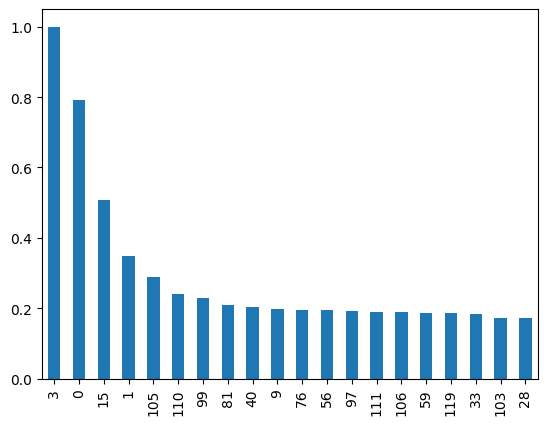

In [91]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

Βλέπουμε ότι με το 4ο άρθρο μοιάζει περισσότερο το 1ο

In [92]:
short_efsyn_df['full_text'].loc[3]

'Με τον αλαζονικό αέρα της πρωτιάς προσέρχεται στη Διακομματική Επιτροπή η Νέα Δημοκρατία προτείνοντας ένα debate με τους πέντε πολιτικούς αρχηγούς (Κυριάκος Μητσοτάκης, Αλέξης Τσίπρας, Νίκος Ανδρουλάκης, Δημήτρης Κουτσούμπας και Κυριάκος Βελόπουλος) εκτοπίζοντας τον Γιάννη Βαρουφάκη, το κόμμα του οποίου δεν κατόρθωσε στις εκλογές της 21ης Μαΐου να πιάσει το όριο του 3% για να εισέλθει στη Βουλή. Ο εκπρόσωπος Τύπου της Ν.Δ., Άκης Σκέρτσος, έκανε γνωστή την πρόταση του κόμματος μιλώντας στον ραδιοφωνικό σταθμό του\xa0Alpha. «Εμείς πιστεύουμε ότι οι τηλεμαχίες, οι συζητήσεις μεταξύ των πολιτικών αρχηγών, είναι οξυγόνο για τη Δημοκρατία», προσθέτοντας πως «σήμερα που έχουμε τη διακομματική συνεδρίαση για το θέμα της τηλεμαχίας, εμείς προσερχόμαστε με θέση να γίνει η τηλεμαχία για\xa0όλα τα κόμματα που έχουν εκλεγεί από την τελευταία κάλπη». Με δύο προτάσεις προσέρχεται στη συνεδρίαση της Διακομματικής Επιτροπής ο ΣΥΡΙΖΑ-Π.Σ.. Σύμφωνα με κομματικές πηγές η Κουμουνδούρου προτείνει να διεξαχ

In [93]:
short_efsyn_df['full_text'].loc[0]

'Τη διεξαγωγή μια τηλεμαχίας μεταξύ των πολιτικών αρχηγών των πέντε κομμάτων που εισήλθαν στη Βουλή, όπως προέκυψε από την κάλπη της 21ης Μαΐου, αποφάσισε η Διακομματική Επιτροπή. Η Νέα Δημοκρατία προσήλθε στη Διακομματική με τον αλαζονικό αέρα της πρωτιάς προτείνοντας αυτό που αποφασίσθηκε, δηλαδή τη διεξαγωγή debate με πέντε πολιτικούς αρχηγούς (Κυριάκος Μητσοτάκης, Αλέξης Τσίπρας, Νίκος Ανδρουλάκης, Δημήτρης Κουτσούμπας και Κυριάκος Βελόπουλος) εκτοπίζοντας τον Γιάννη Βαρουφάκη, το κόμμα του οποίου δεν κατόρθωσε στις εκλογές της 21ης Μαΐου να πιάσει το όριο του 3% για να εισέλθει στη Βουλή. «Εμείς πιστεύουμε ότι οι τηλεμαχίες, οι συζητήσεις μεταξύ των πολιτικών αρχηγών, είναι οξυγόνο για τη Δημοκρατία» είχε δηλώσει νωρίτερα ο Άκης Σκέρτσος, προσθέτοντας πως «προσερχόμαστε με θέση να γίνει η τηλεμαχία για\xa0όλα τα κόμματα που έχουν εκλεγεί από την τελευταία κάλπη». Σύμφωνα με κομματικές πηγές η Κουμουνδούρου πρότεινε να διεξαχθούν δύο debate «ένα μεταξύ των πέντε πολιτικών αρχηγών, 

Ας δούμε την ομοιότητα των 10 πρώτων άρθρων σε ένα γράφημα (heatmap)

In [94]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

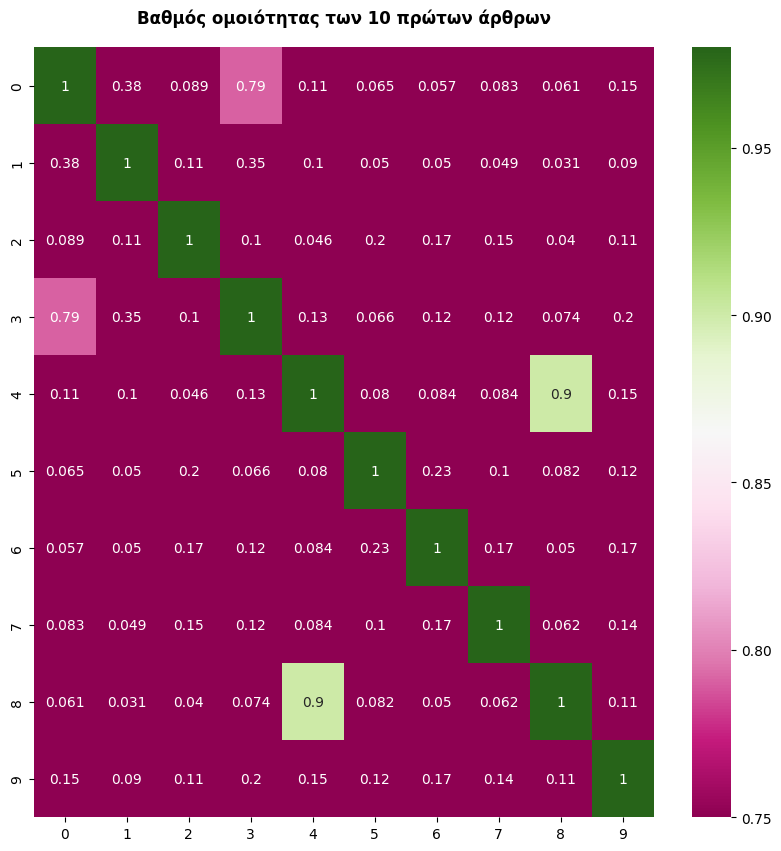

In [95]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')